In [563]:
from sklearn.datasets import make_blobs
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from collections import deque
from sklearn.neighbors import NearestNeighbors

In [609]:
blob_data = make_blobs(n_samples = 1000,
                 n_features = 2,
                 centers = 4,
                 return_centers = True,
                 random_state = 42)
x, y, c, centers = blob_data[0][:,0], blob_data[0][:,1], blob_data[1], blob_data[2]
data = np.stack([x,y], axis = 1)

data = StandardScaler().fit_transform(data)

In [640]:
minPts = 4
eps = 0.15
pdistances = pairwise_distances(data)
label_array = np.zeros(len(data))
visited = np.zeros(len(data))

def DBSCAN(Data, eps = eps, minPts = minPts):
    C = 0
    for idx, dataPt in enumerate(Data):
        if visited[idx] == 0:
            neighbors = regionQuery(idx, eps).nonzero()[0]
            if len(neighbors) >= minPts:
                C += 1
                cluster_pts = find_densely_connected_pts(idx)
                label_array[cluster_pts] = C
            else:
                label_array[idx] = -1

def find_densely_connected_pts(idx):
    queue = deque()
    queue.append(idx)
    visited[idx] = 1
    reachableNodes = []
    
    while len(queue) > 0:
        u = queue.popleft()
        reachableNodes.append(u)
        
        for nIdx in regionQuery(u, eps).nonzero()[0]:
            if visited[nIdx] == 0:
                visited[nIdx] = 1
                queue.append(nIdx)
    return reachableNodes

def regionQuery(ptIdx, eps = eps):
    return pdistances[ptIdx] <= eps           

In [641]:
DBSCAN(data)

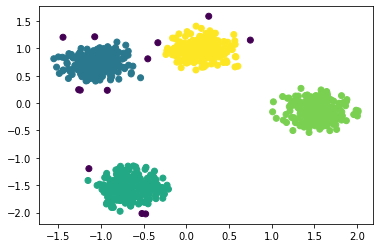

In [642]:
plt.scatter(data[:,0],data[:,1],c = label_array)
plt.show()